> `Execution Editor :  VisualCode Editor`

> `Conda Environment : Python_Julia_Env`

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import julia
import os
from julia import Julia
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

julia.install() # Set Julia Environment
%matplotlib inline 
warnings.filterwarnings("ignore")

[ Info: Julia version info


Julia Version 1.7.3
Commit 742b9abb4d (2022-05-06 12:58 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin21.4.0)
  uname: Darwin 20.6.0 Darwin Kernel Version 20.6.0: Mon Aug 30 06:12:21 PDT 2021; root:xnu-7195.141.6~3/RELEASE_X86_64 x86_64 i386
  CPU: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz: 
              speed         user         nice          sys         idle          irq
       #1  1800 MHz       4548 s          0 s       2199 s      11485 s          0 s
       #2  1800 MHz       1368 s          0 s        760 s      16095 s          0 s
       #3  1800 MHz       4505 s          0 s       1867 s      11851 s          0 s
       #4  1800 MHz       1304 s          0 s        726 s      16192 s          0 s
       
  Memory: 8.0 GB (246.22265625 MB free)
  Uptime: 15694.0 sec
  Load Avg:  3.82568359375  4.2861328125  4.57470703125
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, broadwell)
Environment:
  PATH = /opt/anaconda3/envs/Python_Julia_Env/bin:/opt/anac

[ Info: Julia executable: /Applications/Julia-1.7.app/Contents/Resources/julia/bin/julia
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: /opt/anaconda3/envs/Python_Julia_Env/bin/python
│     libpython: /opt/anaconda3/envs/Python_Julia_Env/lib/libpython3.8.dylib
│ Python:
│     python: /opt/anaconda3/envs/Python_Julia_Env/bin/python
└     libpython: 


### Julia Object Creation

In [54]:
jl = Julia(compiled_modules=False)

### Adding Julia Packages

In [14]:
# jl.eval('Pkg.add("CSV")')
# jl.eval('Pkg.add("DataFrames")')
# jl.eval('Pkg.add("Pandas")')
# jl.eval('Pkg.add("Plots")')
# jl.eval('Pkg.add("PyPlot")')

### Importing Julia Modules

In [15]:
# jl.eval('using Pandas')
# jl.eval('using DataFrames')

- `Julia DataFrame`

In [16]:
# res = jl.eval('DataFrame(Dict(:age=>[27, 29, 27], :name=>["James", "Jill", "Jake"]))')
# res

In [17]:
# jl.typeof(res)

- `Print Message`

In [18]:
jl.eval('print("Hello Julia")')

Hello Julia

### Python-Julia Modules Import 

In [34]:
from julia import Base, Main, Pandas, DataFrames, CSV, Plots

%load_ext julia.magic

Initializing Julia interpreter. This may take some time...


### Julia Statements

In [42]:
Main.eval('[x^2 for x in 0:4]')

array([ 0,  1,  4,  9, 16], dtype=int64)

In [43]:
Main.eval('A = rand(3, 3)')

array([[0.21631685, 0.9069332 , 0.7911989 ],
       [0.86925749, 0.64587215, 0.34224661],
       [0.59310177, 0.24723837, 0.190586  ]])

In [44]:
Main.b = Main.eval('A * ones(3)')

In [45]:
%julia x = A \ b

array([1., 1., 1.])

In [48]:
print(Main.A)
print(Main.b)
print(Main.x)

[[0.21631685 0.9069332  0.7911989 ]
 [0.86925749 0.64587215 0.34224661]
 [0.59310177 0.24723837 0.190586  ]]
[1.91444896 1.85737624 1.03092614]
[1. 1. 1.]


- `Julia DataFrame : Case 1`

In [20]:
julia_df = DataFrames.DataFrame(a=[1, 2, 3, 4])

julia_df

<PyCall.jlwrap 4×1 DataFrame
 Row │ a
     │ Int64
─────┼───────
   1 │     1
   2 │     2
   3 │     3
   4 │     4>

In [21]:
type(julia_df)

PyCall.jlwrap

In [22]:
python_df = Pandas.DataFrame(julia_df)

python_df

,a
0,1
1,2
2,3
3,4


- `Julia DataFrame : Case 2`

In [36]:
data = {
    'Fruits': ["Apple", "Mango"],
    'Cost': [10, 20]
    }

df = pd.DataFrame(data, columns = ['Fruits', 'Cost'])
df

,Fruits,Cost
0,Apple,10
1,Mango,20


In [41]:
# julia_df = DataFrames.DataFrame(df)
# julia_df

### Python CSV Import

In [28]:
python_df_iris = pd.read_csv(os.path.dirname(os.getcwd()) + "/Data/iris.csv")
python_df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
type(python_df_iris)

pandas.core.frame.DataFrame

In [32]:
# julia_df_iris = DataFrames.DataFrame(python_df_iris)
# julia_df_iris

### Pyjulia Codes : More Systematic Procedure

In [57]:
os.getcwd()

'/Users/rock/Git_Repo/Julia_Codes/Scripts'

In [66]:
res = jl.include("Packages_Installation.jl")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Chan

- `Import Libraries`

In [91]:
from julia import Base, Main, Pandas, DataFrames, CSV, Plots, StatsBase, StatsPlots, Gadfly, Plots 
from julia.PyPlot import plot

- `Current Working Directory`

In [68]:
%julia println(homedir())
%julia println(pwd())

/Users/rock
/Users/rock/Git_Repo/Julia_Codes/Scripts


In [69]:
%julia readdir()

['Packages_Installation.jl', 'Pyjulia_Codes.ipynb']

- `Import CSV File`

In [73]:
file_path = os.path.dirname(os.getcwd()) + "/Data/iris.csv"

Main.eval('using CSV')
Main.eval('using DataFrames')
Main.eval('jdf = CSV.read("{}", DataFrames.DataFrame)'.format(file_path))

<PyCall.jlwrap 150×5 DataFrame
 Row │ sepal_length  sepal_width  petal_length  petal_width  species
     │ Float64       Float64      Float64       Float64      String15
─────┼──────────────────────────────────────────────────────────────────
   1 │          5.1          3.5           1.4          0.2  setosa
   2 │          4.9          3.0           1.4          0.2  setosa
   3 │          4.7          3.2           1.3          0.2  setosa
   4 │          4.6          3.1           1.5          0.2  setosa
   5 │          5.0          3.6           1.4          0.2  setosa
   6 │          5.4          3.9           1.7          0.4  setosa
   7 │          4.6          3.4           1.4          0.3  setosa
   8 │          5.0          3.4           1.5          0.2  setosa
   9 │          4.4          2.9           1.4          0.2  setosa
  10 │          4.9          3.1           1.5          0.1  setosa
  11 │          5.4          3.7           1.5          0.2  setosa
  12 │   

In [75]:
Main.jdf

<PyCall.jlwrap 150×5 DataFrame
 Row │ sepal_length  sepal_width  petal_length  petal_width  species
     │ Float64       Float64      Float64       Float64      String15
─────┼──────────────────────────────────────────────────────────────────
   1 │          5.1          3.5           1.4          0.2  setosa
   2 │          4.9          3.0           1.4          0.2  setosa
   3 │          4.7          3.2           1.3          0.2  setosa
   4 │          4.6          3.1           1.5          0.2  setosa
   5 │          5.0          3.6           1.4          0.2  setosa
   6 │          5.4          3.9           1.7          0.4  setosa
   7 │          4.6          3.4           1.4          0.3  setosa
   8 │          5.0          3.4           1.5          0.2  setosa
   9 │          4.4          2.9           1.4          0.2  setosa
  10 │          4.9          3.1           1.5          0.1  setosa
  11 │          5.4          3.7           1.5          0.2  setosa
  12 │   

In [76]:
# Data Size
Main.size(Main.jdf)

(150, 5)

In [77]:
# Columns
Main.names(Main.jdf) 

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [78]:
# First 10 rows
Main.first(Main.jdf, 2)

<PyCall.jlwrap 2×5 DataFrame
 Row │ sepal_length  sepal_width  petal_length  petal_width  species
     │ Float64       Float64      Float64       Float64      String15
─────┼────────────────────────────────────────────────────────────────
   1 │          5.1          3.5           1.4          0.2  setosa
   2 │          4.9          3.0           1.4          0.2  setosa>

In [121]:
# to get statistics of a dataset
# Main.eval('describe(jdf)')

In [88]:
Main.eval('jdf[:, r"sepal_length"]')

<PyCall.jlwrap 150×1 DataFrame
 Row │ sepal_length
     │ Float64
─────┼──────────────
   1 │          5.1
   2 │          4.9
   3 │          4.7
   4 │          4.6
   5 │          5.0
   6 │          5.4
   7 │          4.6
   8 │          5.0
   9 │          4.4
  10 │          4.9
  11 │          5.4
  12 │          4.8
  13 │          4.8
  14 │          4.3
  15 │          5.8
  16 │          5.7
  17 │          5.4
  18 │          5.1
  19 │          5.7
  20 │          5.1
  21 │          5.4
  22 │          5.1
  23 │          4.6
  24 │          5.1
  25 │          4.8
  26 │          5.0
  27 │          5.0
  28 │          5.2
  29 │          5.2
  30 │          4.7
  31 │          4.8
  32 │          5.4
  33 │          5.2
  34 │          5.5
  35 │          4.9
  36 │          5.0
  37 │          5.5
  38 │          4.9
  39 │          4.4
  40 │          5.1
  41 │          5.0
  42 │          4.5
  43 │          4.4
  44 │          5.0
  45 │          5.1
  46 │       

In [89]:
%julia Main.jdf[:3, [:sepal_length]]

<PyCall.jlwrap DataFrameRow
 Row │ sepal_length
     │ Float64
─────┼──────────────
   3 │          4.7>

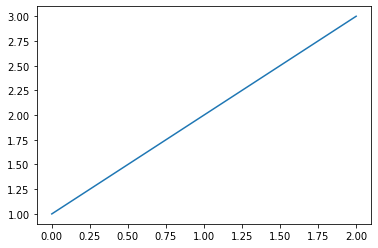

In [159]:
%matplotlib inline

# Main.eval('Plots.plot(jdf, x=:species, y=:sepal_length, kind="bar")')
plot([1,2,3])

In [114]:
df = pd.DataFrame(Main.eval('jdf[:3, [:sepal_length]]'))
df

,0
0,4.7


In [ ]:
# Main.eval("""
# dfj = df |> Pandas.DataFrame|> DataFrames.DataFrame;
# """)

In [122]:
Main.eval(""" 
first(jdf, 2)
""")

<PyCall.jlwrap 2×5 DataFrame
 Row │ sepal_length  sepal_width  petal_length  petal_width  species
     │ Float64       Float64      Float64       Float64      String15
─────┼────────────────────────────────────────────────────────────────
   1 │          5.1          3.5           1.4          0.2  setosa
   2 │          4.9          3.0           1.4          0.2  setosa>

In [123]:
Main.eval(""" 
pdf = first(jdf, 2) |> Pandas.DataFrame
""")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [125]:
Main.pdf

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [126]:
type(Main.pdf)

pandas.core.frame.DataFrame

In [127]:
df2 = pd.DataFrame(Main.pdf)
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [128]:
type(df2)

pandas.core.frame.DataFrame

In [138]:
# Main.eval("""
# plot(jdf, x=:species, y=:sepal_length, kind="bar")
# """)

In [148]:
%matplotlib inline 

jl.include("Plots.jl")

f = Plot{Plots.GRBackend() n=1}

<PyCall.jlwrap Plot{Plots.GRBackend() n=1}>

In [154]:
%matplotlib inline 

Main.eval("""
data2 = rand(10, 2); # 10x2 random mat
Plots.plot(data2)
""")

<PyCall.jlwrap Plot{Plots.GRBackend() n=2}>

In [155]:
Main.eval("""
plot!(rand(10))
""")

<PyCall.jlwrap Plot{Plots.GRBackend() n=3}>

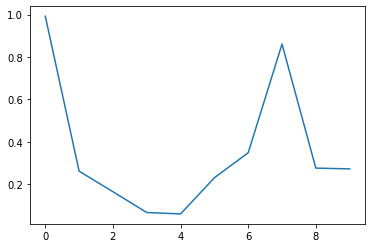

In [163]:
%matplotlib inline 

plot(Main.eval("(rand(10))"))

In [172]:
%matplotlib inline

# plot(Main.eval("""(jdf, x=:species, y=:sepal_length, kind="bar")"""))

# plot(Main.eval("""(jdf, markershape = :ltriangle, linestyle = :dashdot, color = [:black :orange])"""))